

 GPs. Notebook 1. Introduction to Gaussian Processes

------------------------------------------------------
*Machine Learning, Master in Information & Health Engineering

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

Gaussian processes have emerged as one of the most powerful techniques to perform probabilistic tasks such as regression, classification and both linear/non-linear dimensionality reduction. They are a must in  in **high-dimensional problems** with small datasets. In the past few years, scalable versions have been developed, allowing the use of [GPs with millions of training points](https://arxiv.org/pdf/1610.05392.pdf), achieving competitive results with respect to deep learning approaches. 

Recommended Bibliography:

- [An introduction to Gaussian Processes](http://www.inference.org.uk/mackay/gpB.pdf), by David J.C. Mackay
- Chapter 6 of [Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/textbook/090310.pdf), David Barber, 2010
- Chapter 15 of Machine Learning: a probabilistic perspective, Kevin Murphy 2012
- [Gaussian Processes for Machine Learning](Gaussian Processes for Machine Learning), by Carl Edward Rasmussen and Christopher K. I. Williams. 

And these slides are really nice

-[A Tutorial on Gaussian Processes (or why I don’t use SVMs)](http://mlss2011.comp.nus.edu.sg/uploads/Site/lect1gp.pdf), by Zoubin Ghahramani



**The following examples are mainly based on the tutorials included in the GPy official documentation**. I added some more details and interpretations, but everything is based on their exellent work!

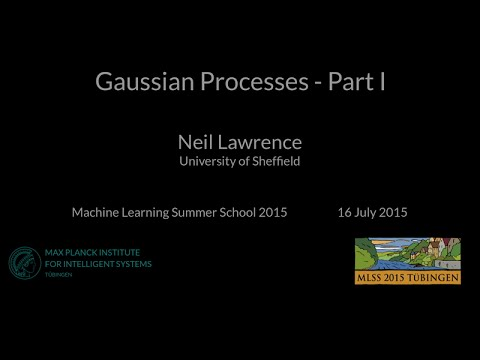

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('S9RbSCpy_pg')   # Gaussian Processes Part I by Neil Lawence at the 2015 Machine Learning Summer School

#YouTubeVideo('MxeQIKGEXb8')   # Part II

#YouTubeVideo('MxeQIKGEXb8')   # Part III
 

## Installing and importing GPy Library

[GPy](https://sheffieldml.github.io/GPy/) is a Gaussian Process (GP) framework written in python, from the Sheffield machine learning group. 

We asume GPy is already installed in your computer. If is not, follow the instructions provided in their [Github repository](https://github.com/SheffieldML/GPy). 


In [1]:
# You can also install GPy using the following command (Works on Windows!)

!pip install GPy 

     |████████████████████████████████| 1.0MB 3.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633953 sha256=2215c7596c474d850542850024531dcbe3578204edde3ee656694d63791c063a
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=a7c039524918d6aa0d5f0e2b77a88fd0279ef3b98de6d5a2ace60a3691ea4630
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [0]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!
plt.rcParams["figure.figsize"] = [8,8]

## 1-dimensional regression example

We will now combine the Gaussian process prior with some data to form a GP regression model with GPy. We will generate data from the function $f ( x ) = − \cos(2*\pi x ) + \sin(4\pi x )$ over $[0, 1]$, adding some noise to give $y(x) = f(x) + \epsilon$, with the noise being Gaussian distributed, $\epsilon \sim \mathcal{N}(0, 0.01)$. 

(-1.0, 1.0)

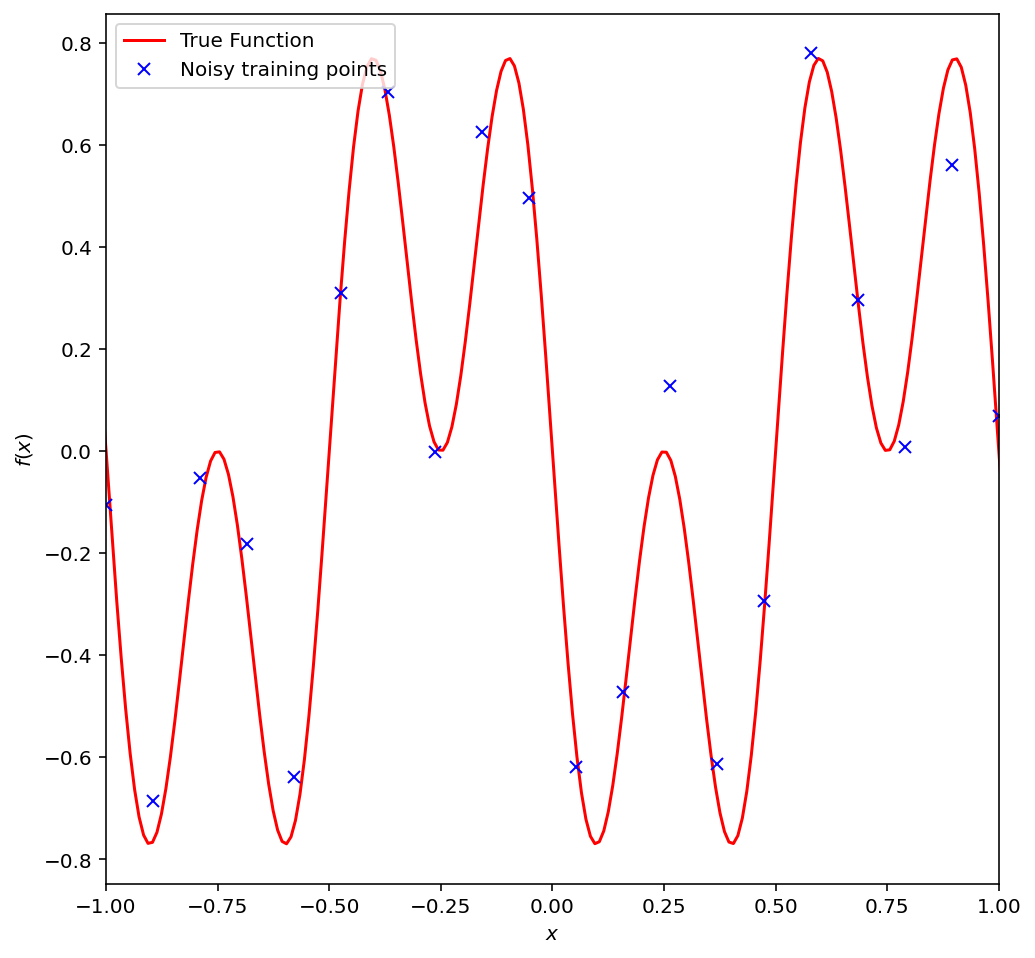

In [5]:
npoints = 20
X = np.linspace(-1,1,npoints)[:,None]
Y = -np.cos(2*np.pi*X)* + np.sin(4*np.pi*X) + np.random.randn(npoints,1) * np.sqrt(0.01)

X_true = np.linspace(-5,5,1000)[:,None]
Y_true = -np.cos(2*np.pi*X_true)* + np.sin(4*np.pi*X_true)

plt.figure()
plt.plot(X_true,Y_true,'r')
plt.plot(X,Y,'bx',ms=6)
plt.legend(['True Function','Noisy training points'])
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim([-1,1])

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

\begin{align}
k(\mathbf{x},\mathbf{x}^*) = \sigma^2 \exp \left(- \frac{||\mathbf{x}-\mathbf{x}^*||^2}{2 \ell^2}\right),
\end{align}
where $\sigma^2$ and $\ell^2$ are the variance and the lengthscale hyperparameters. These parameters are optional (we will learn them later by maximizing the model evidence), and their default value is 1.

In [0]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=0.02)

The inputs required for building the model are the observations and the kernel:

In [0]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model (with variance equal to 1). The functions display and plot give an insight of the model we have just built:

In [8]:
from IPython.display import display
display(m)
#You can also type print(m), but is not that nicely formatted

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,0.02,+ve,
Gaussian_noise.variance,1.0,+ve,


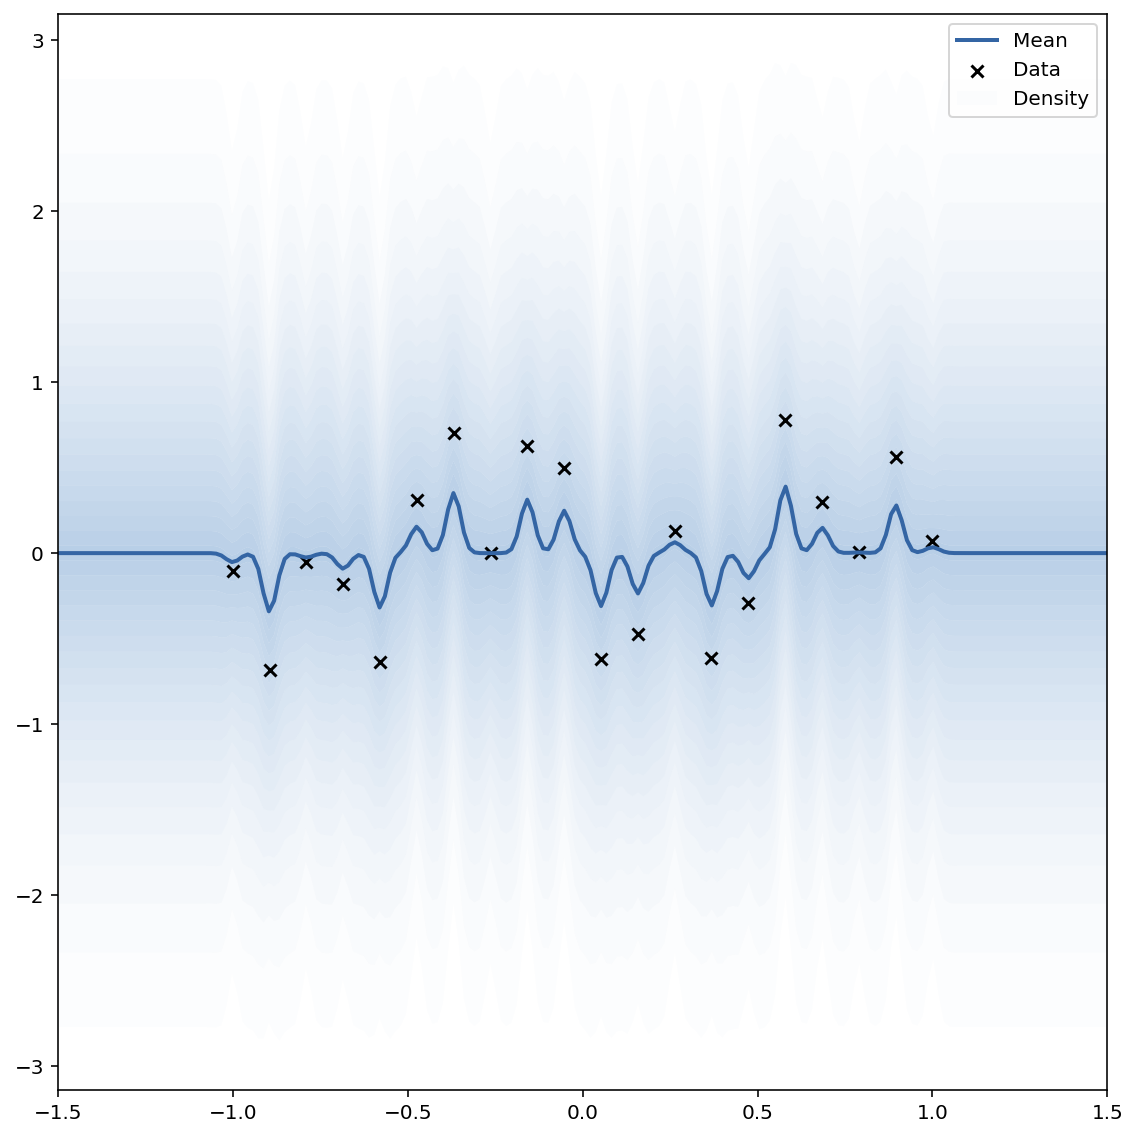

In [9]:
fig = m.plot(plot_density=True)

The above cell shows our GP regression model **before optimization of the parameters**. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood (also called evidence) of the data. It as easy as calling m.optimize in GPy:


In [0]:
m.optimize(messages=True)

If we want to perform some restarts to try to improve the result of the optimization, we can use the optimize_restarts function. This selects random (drawn from $\mathcal{N}(0,1)$) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [10]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 12.881320757983143
Optimization restart 2/10, f = 12.346513443903088
Optimization restart 3/10, f = 12.780095272427667
Optimization restart 4/10, f = 12.346512976511338
Optimization restart 5/10, f = 12.881322207399945
Optimization restart 6/10, f = 12.78009527096287
Optimization restart 7/10, f = 12.881326409128924
Optimization restart 8/10, f = 12.34651297505612
Optimization restart 9/10, f = 12.881322303278914
Optimization restart 10/10, f = 12.346513402101449


Let's plot the trained model

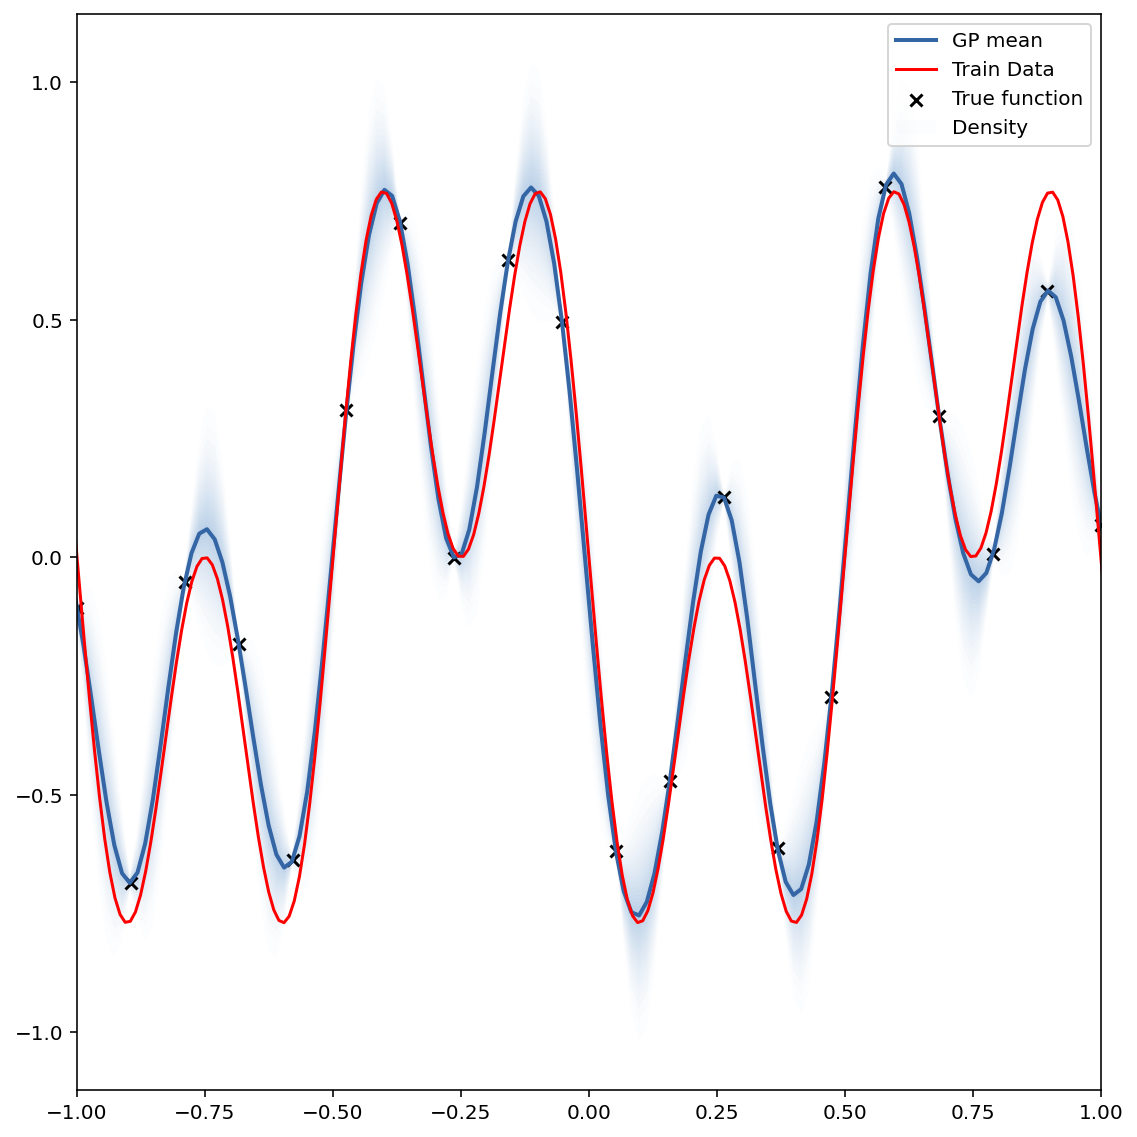

In [11]:
fig = m.plot(plot_density=True)

plt.plot(X_true,Y_true,'r')
plt.xlim([-1,1])
plt.legend(['GP mean','Train Data','True function','Density'])

## The periodic exponential kernel

Let's visualize GP samples for values $X\in[-5,5]$. Also, the estimated mean.

In [0]:
#Test set
#Xtest = np.linspace(-5,5,200)[:,None]
#Ytest = -np.cos(2*np.pi*Xtest) + np.sin(4*np.pi*Xtest) + np.random.randn(200,1) * np.sqrt(0.01)

nsamples = 5
posteriorYtest = m.posterior_samples_f(X_true, full_cov=True, size=nsamples)
meanYtest,_ = m.predict(X_true,full_cov=True)


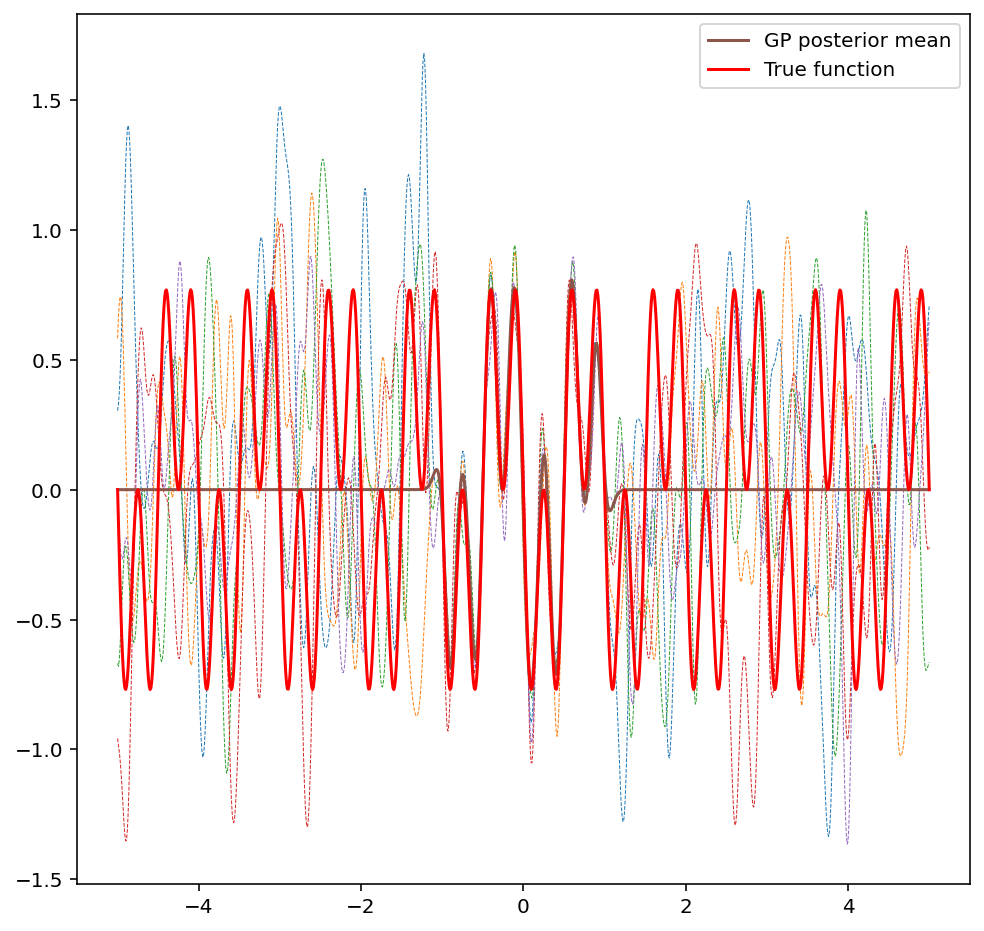

In [17]:
plt.figure()

plt.plot(X_true,posteriorYtest.reshape([-1,nsamples]),'--',lw=0.5,)
plt.plot(X_true,meanYtest,label='GP posterior mean')
plt.plot(X_true,Y_true,'r',label='True function')
plt.legend()

Obviously, since the GP has never seen data points out of the $[-1,1]$ range, then its uncertainty out of this region grows very fast and its estimation is esentially a zero-mean output.

**What if we knew that the signal we try to fit is periodic?**

If so, we should incorporate this information to the kernel itself!! 

Fortunately, GPy incorporates [a periodic exponential kernel](http://gpy.readthedocs.io/en/deploy/GPy.kern.src.html#module-GPy.kern.src.periodic)


In [0]:
kernel2 = GPy.kern.PeriodicExponential(input_dim=1,variance=5.,lengthscale=1.) #The default period is 2*pi

In [0]:
m2 = GPy.models.GPRegression(X,Y,kernel2)

In [20]:
X.shape

(20, 1)

In [21]:
display(m2)

GP_regression.,value,constraints,priors
periodic_exponential.variance,5.0,+ve,
periodic_exponential.lengthscale,1.0,+ve,
periodic_exponential.period,6.283185307179586,+ve,
Gaussian_noise.variance,1.0,+ve,


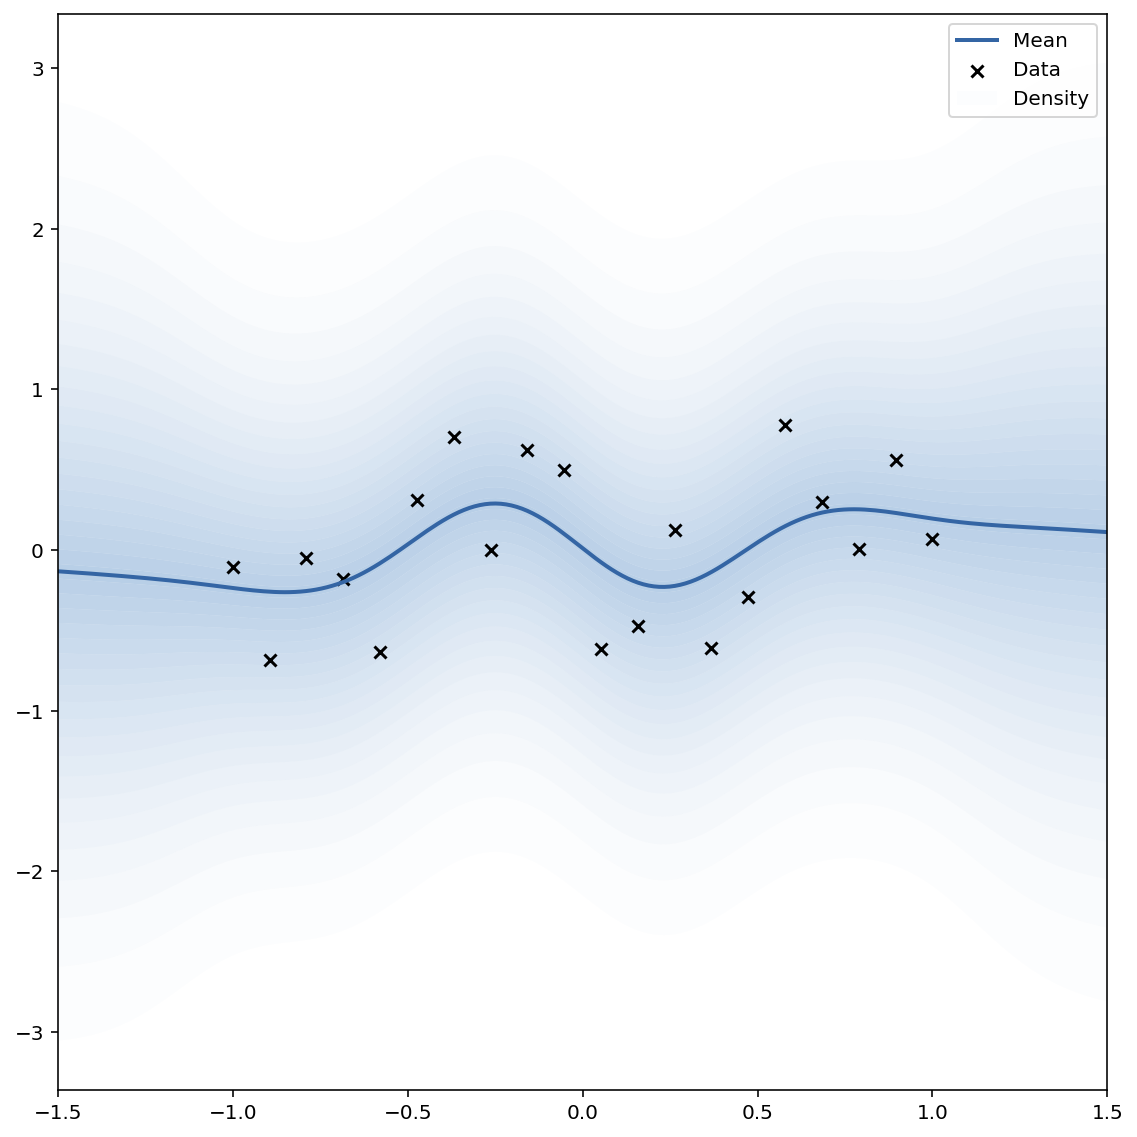

In [22]:
fig = m2.plot(plot_density=True)

Let's train the GP with the periodic kernel. **Recall that all of our training points are still in the [-1,1] region**

In [23]:
m2.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 12.881322516604305
Optimization restart 2/10, f = 0.9841333946455322
Optimization restart 3/10, f = 8.152953567017276
Optimization restart 4/10, f = 0.9841333919075108
Optimization restart 5/10, f = 7.0183950571697284
Optimization restart 6/10, f = 12.88132222248914
Optimization restart 7/10, f = 0.984133392043617
Optimization restart 8/10, f = 12.881322774061779
Optimization restart 9/10, f = 0.9841333917023007
Optimization restart 10/10, f = 8.152953566905037


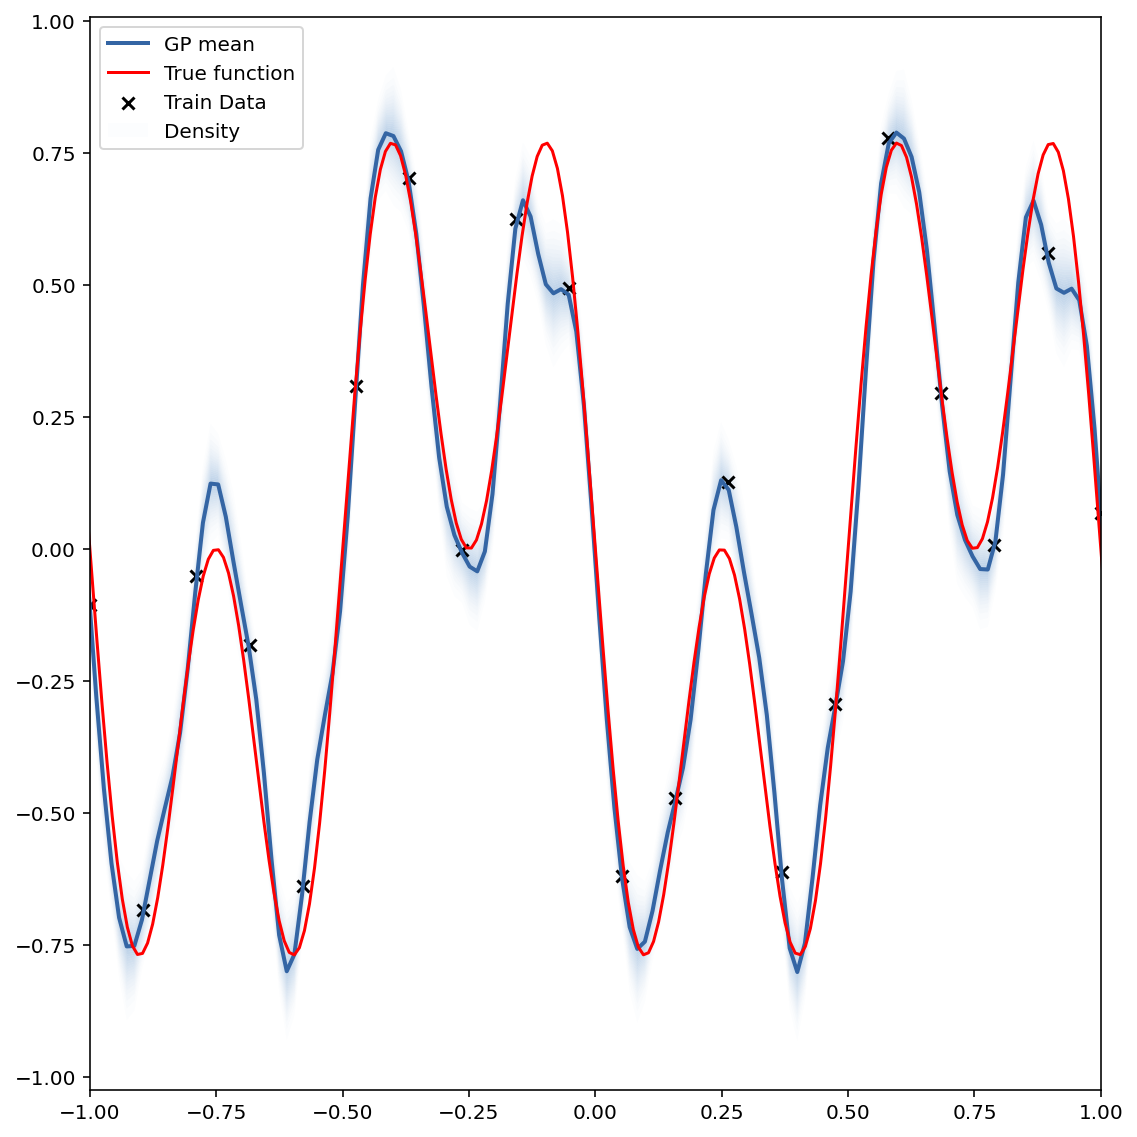

In [24]:
fig = m2.plot(plot_density=True)

plt.plot(X_true,Y_true,'r')
plt.xlim([-1,1])
plt.legend(['GP mean','True function','Train Data', 'Density'])

In [25]:
display(m2) # Observe that the period is nicely found

GP_regression.,value,constraints,priors
periodic_exponential.variance,7.994716450577863,+ve,
periodic_exponential.lengthscale,0.4172675662676352,+ve,
periodic_exponential.period,1.0064622959444165,+ve,
Gaussian_noise.variance,0.0012026419416833994,+ve,


If we now plot samples of the posterior GP, we inmmediatly realize that, by exploiting the periodicity of the unobserved signal, it is able to generalize to regions where it did never see any training points.

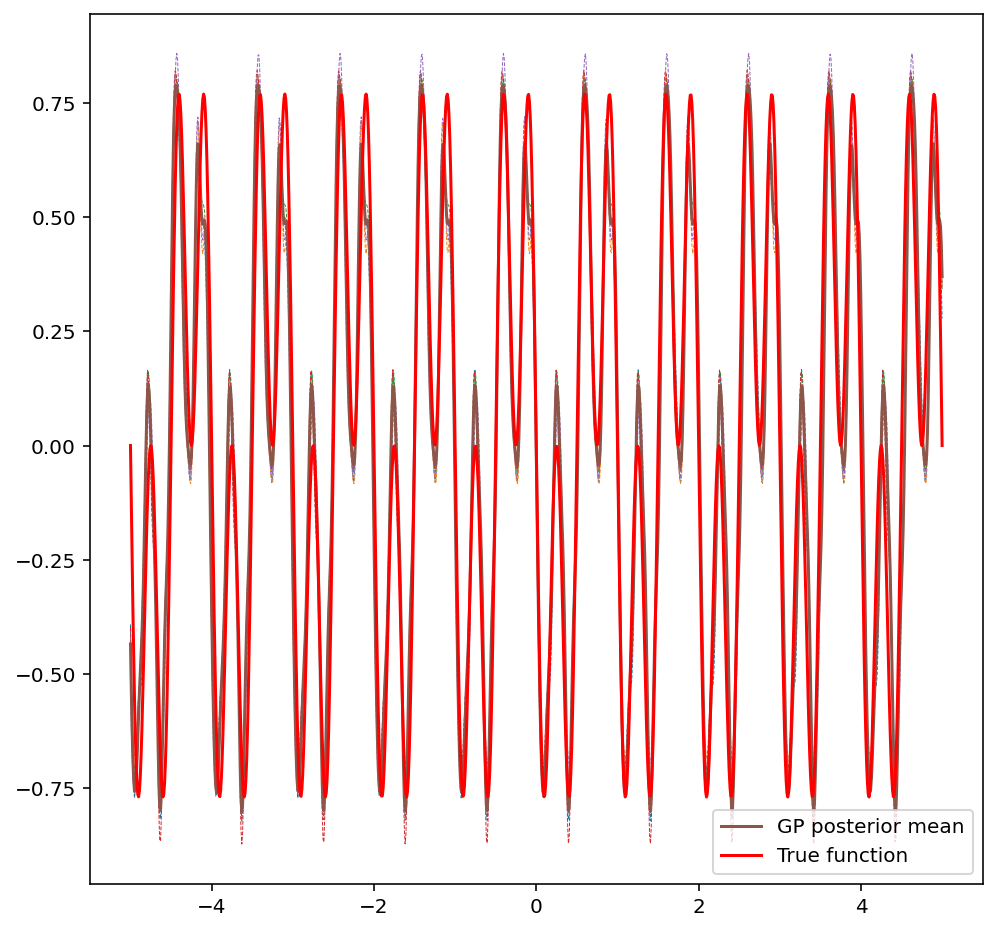

In [26]:
posteriorYtest2 = m2.posterior_samples_f(X_true, full_cov=True, size=nsamples)
meanYtest2,_ = m2.predict(X_true,full_cov=True)

plt.figure()

plt.plot(X_true,posteriorYtest2.reshape([-1,nsamples]),'--',lw=0.5,)
plt.plot(X_true,meanYtest2,label='GP posterior mean')
plt.plot(X_true,Y_true,'r',label='True function')
plt.legend()

### On kernels and combinations of kernels

It is a **must** to [**check out this tutorial**](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) to see a list of implemented kernels and allowed combinations to generate new ones!

## Regression with 2D inputs

Let's load another database, this time with multidimensional inputs. 

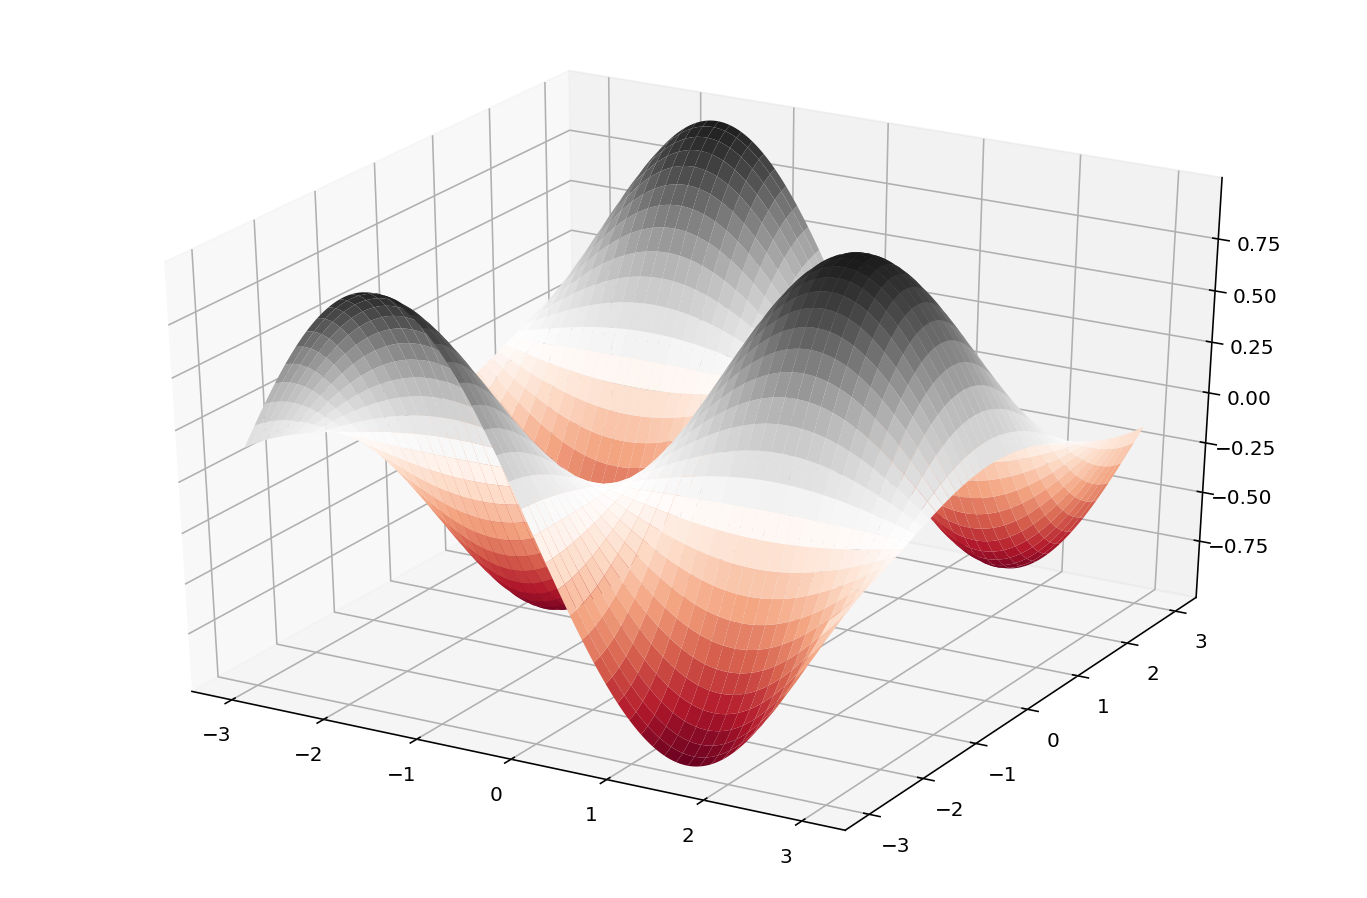

In [0]:
# True surface
intervals = 200
a = np.linspace(-3, 3, intervals)
b = np.linspace(-3, 3, intervals)

C,D = np.meshgrid(a,b)

cyd = np.vstack([C.ravel(), D.ravel()]).T

Z = np.sin(cyd[:,0])* np.cos(cyd[:,1])

Z = Z.reshape([intervals,intervals])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(C, D, Z, cmap='RdGy')

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fd152cd4978>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7fd152cd4d68>]}

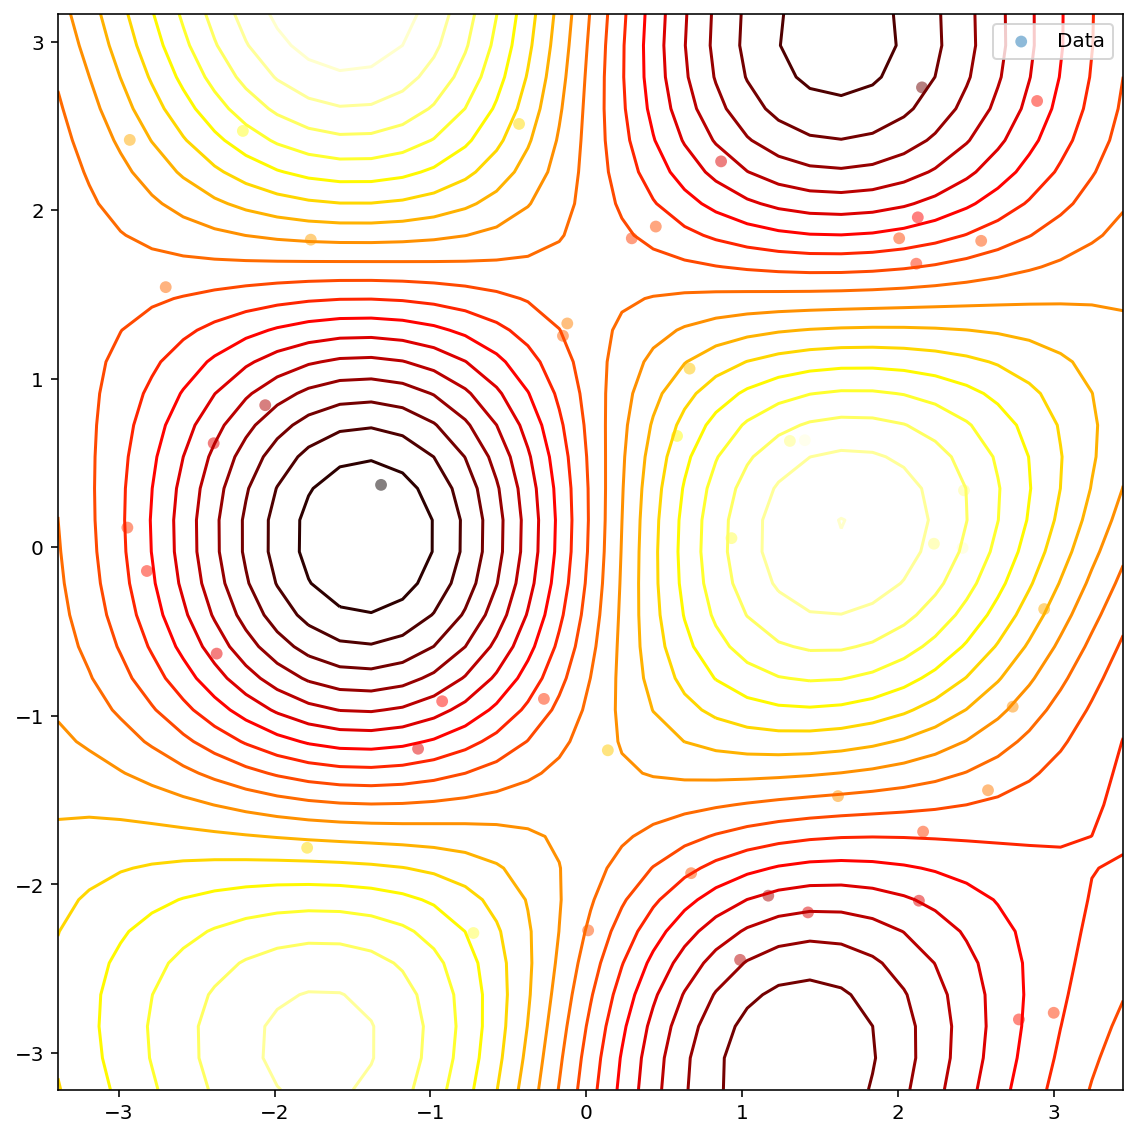

In [0]:
# sample noisy training points
npoints = 50
X = np.random.uniform(-3.,3.,(npoints,2))
Y = np.sin(X[:,0]) * np.cos(X[:,1])+np.random.randn(npoints,)*np.sqrt(0.01)

# define kernel
ker3 = GPy.kern.RBF(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m3 = GPy.models.GPRegression(X,Y.reshape([-1,1]),ker3)

# optimize and plot
m3.optimize(messages=True,max_f_eval = 1000)
m3.plot()



Observe we have used an  **Automatic Relevance Determination** kernel **plus a white noise kernel**. In the RBF-ARD kernel,  each input dimension has a different lengthscale, hence enabling interpretability:

\begin{align}
k(\mathbf{x},\mathbf{x}^*) = \sigma^2 \exp \left(- \sum_{d=1}^{D} \frac{(x_d-x_d^*)^2}{2\ell_d^2}\right) + \gamma
\end{align}

Let's get a list of all kernel hyperparameters and their values

In [0]:
print(ker3.parameter_names())

print(ker3.rbf.variance.values)

print(ker3.rbf.lengthscale.values)

print(ker3.white.variance.values)

['rbf.variance', 'rbf.lengthscale', 'white.variance']
[0.4084748]
[1.41404251 1.42801945]
[0.00663941]


In this example, both dimensions weight equally in the GP kernel. Lets create another example where this does not happen.

## Regression with 2D inputs (example 2)

Observe that $Y$ points are not really correlated through $X[:,1]$. This should be captured by the ARD parameter in the GP kernel!

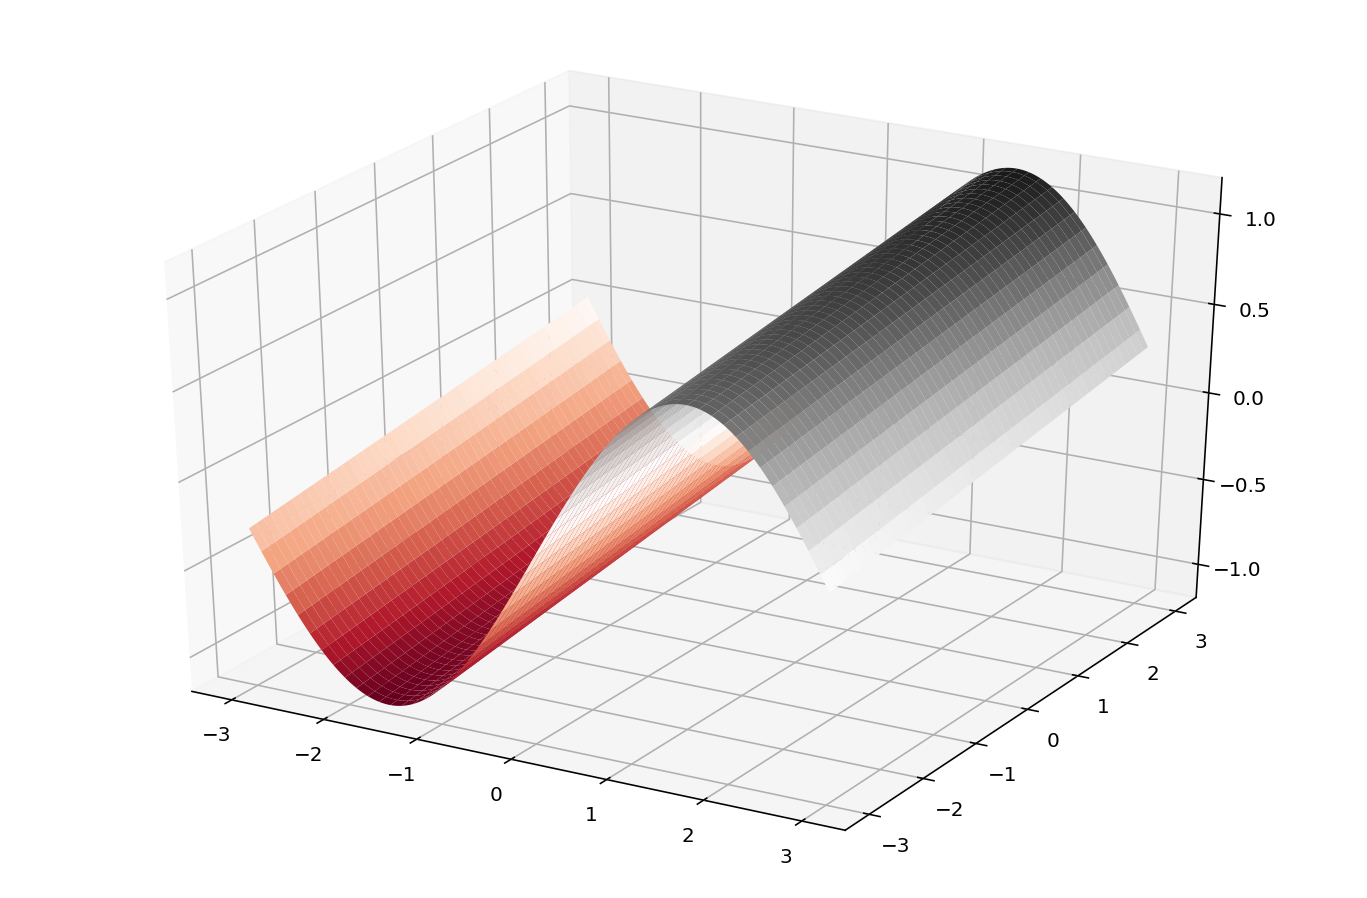

In [0]:
# True surface
intervals = 200
a = np.linspace(-3, 3, intervals)
b = np.linspace(-3, 3, intervals)

C,D = np.meshgrid(a,b)

cyd = np.vstack([C.ravel(), D.ravel()]).T

Z = np.sin(cyd[:,0])+ 0.05*(cyd[:,1])

Z = Z.reshape([intervals,intervals])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(C, D, Z, cmap='RdGy')

In [0]:
# sample noisy training points
npoints = 50
X = np.random.uniform(-3.,3.,(npoints,2))
Y = np.sin(X[:,0:1]) + 0.05*X[:,1:2]+np.random.randn(npoints,1)*np.sqrt(0.01)



{'dataplot': [<matplotlib.collections.PathCollection at 0x7fd14c5b00b8>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7fd14c5b0550>]}

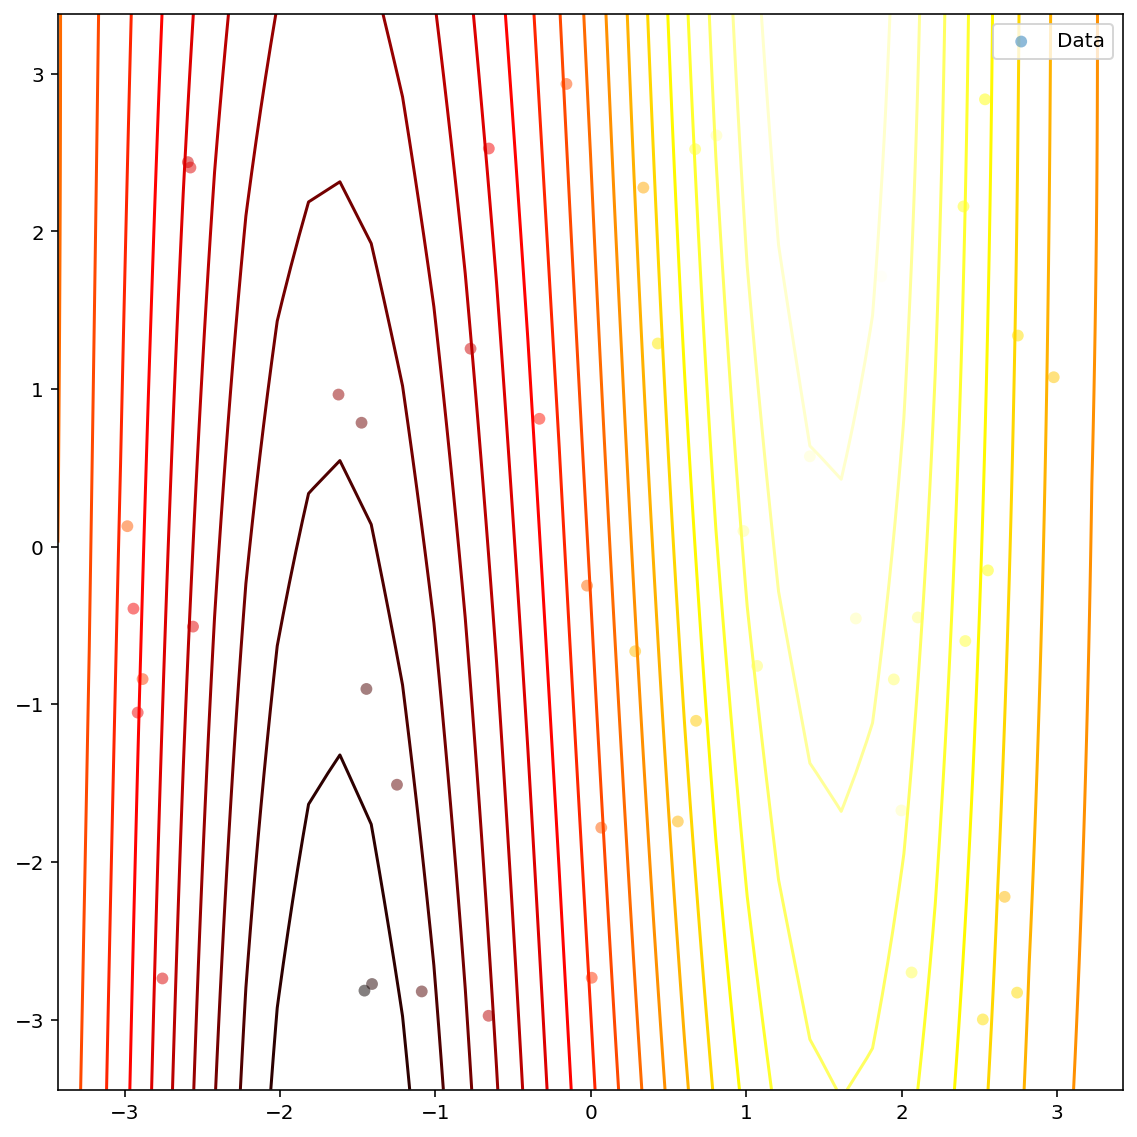

In [0]:
# define kernel
ker4 = GPy.kern.RBF(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m4 = GPy.models.GPRegression(X,Y,ker4)

# optimize and plot
m4.optimize(messages=True,max_f_eval = 1000)
m4.plot()


In [0]:
print(ker4.parameter_names())

print(ker4.rbf.variance.values)

print(ker4.rbf.lengthscale.values)

print(ker4.white.variance.values)

['rbf.variance', 'rbf.lengthscale', 'white.variance']
[0.40809178]
[ 1.18234385 13.82336433]
[0.00457956]


Note that the lengthscale corresponding to the second dimension is much larger!! 